In [2]:
### 03. 데이터 준비하기.ipynb의 내용 (scaled_data 사용하기 위한 코드)
import pandas as pd
import seaborn as sns

# 판다스 출력 결과를 소수점 둘째 자리 까지로 제한
pd.options.display.float_format = '{:,.2f}'.format

sales_df = pd.read_csv('data/sales_data.csv', index_col=['customer_id'])
sales_df
# =====
# 이상치 제거 함수
def get_outlier_mask(df, weight=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    IQR = Q3 = Q1
    IQR_weight = IQR * weight

    range_min = Q1 - IQR_weight  # 정상범위의 최소값
    range_max = Q3 + IQR_weight  # 정상범위의 최대값

    outlier_per_column = (df < range_min) | (df > range_max)  # 최소값보다 작거나, 최대값보다 크면 이상치로 간주. 
                                                              # -> 불린값을 Pandas Series로 반환..할 듯
    
    is_outlier = outlier_per_column.any(axis=1)  # 각 행에 대하여 True 혹은 False 값을 가진 Pandas Series가 반환됨. (True이면 이상치.)

    return is_outlier
# =====
outlier_idx_cust_df = get_outlier_mask(sales_df, weight=1.5)  # True/False 값을 가진 Pandas Series가 반환됨.

# 아웃라이어 제거한 데이터 프레임만 추가
sales_df = sales_df[~outlier_idx_cust_df]
# =====
df_mean = sales_df.mean()  # 각 컬럼의 평균값
df_std = sales_df.std()  # 각 컬럼의 표준편차

scaled_df = (sales_df - df_mean) / df_std  # 컬럼별 표준화 진행 ~> 이게 왜 표준화가 되지?

# 컬럼명 설정.
scaled_df.columns = ['total_buy_cnt', 'total_price']

# 인덱스 설정
scaled_df.index = sales_df.index

scaled_df

### 05. 모델 학습 및 시각화.ipynb의 내용 (model 사용하기 위한 코드)
from sklearn.cluster import KMeans

# k-means (k=2)
model = KMeans(n_clusters=2, random_state=123)

# 모델 학습
model.fit(scaled_df)

# label 컬럼 생성
scaled_df['label'] = model.predict(scaled_df)  # 이 label에는 각 행이 어느 클러스터로 군집화 되었는지가 들어있음.

scaled_df

c:\Users\emma1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,total_buy_cnt,total_price,label
customer_id,,,
12471,-0.99,-0.66,0
12557,-0.40,-0.71,0
12600,-0.88,0.33,0
12686,1.74,0.57,1
12748,-0.74,-0.60,0
...,...,...,...
17949,-1.33,-0.45,0
17951,-0.03,0.50,0
18085,0.93,1.59,1


## 최적의 k 선정 기준

최적의 클러스터 개수는 어떻게 찾을 수 있을까요? 그를 위해선 k-means가 잘 됐다는 것을 판단할 수 있는 기준이 필요합니다.

k-means는 k개의 Centroid에 가까이 모여 있는 데이터들을 하나의 클러스터로 묶어 주는 방법이었죠?  
그렇다면, <span style="color:yellowgreen"> 클러스터마다 속한 데이터와 Centroid 사이 거리의 합이 작아야</span> 잘 된 클러스터링이겠네요.

그걸 확인하기 위해 사용하는 값이 바로 inertia(이너시아)입니다. inertia는  
<span style="color:yellowgreen"> 각 클러스터에 속한 데이터들과 Centroid 사이의 거리를 제곱해서 전부 더한 값</span>입니다.

inertia는 `KMeans()`에 데이터로 모델을 학습시키면 `inertia_`라는 변수에 저장됩니다.

In [3]:
# inertia 값 확인
print(model.inertia_)

79.2811681328648


## Elbow Method
그런데, k를 하나로만 정의해서 inertia를 구하면 해당 값이 큰지 작은지 판단하기가 어렵겠죠?  
그래서, 서로 다른 k값 여러 개로 모델을 만든 다음에 각각의 inertia 값을 비교해 봐야 합니다.  

먼저, 기존 실습에서 scaled_df에 추가했던 label 열을 제거해 줄게요.

In [6]:
# scale_df에 추가했던 label 열을 제거
scaled_df = scaled_df.drop(['label'], axis=1)

다음으로 k의 개수를 1부터 15까지로 다르게 하여 각각의 inertia 값을 계산하고, 해당 값들을 시각화해 보겠습니다.

c:\Users\emma1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\emma1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\emma1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\emma1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

<Axes: >

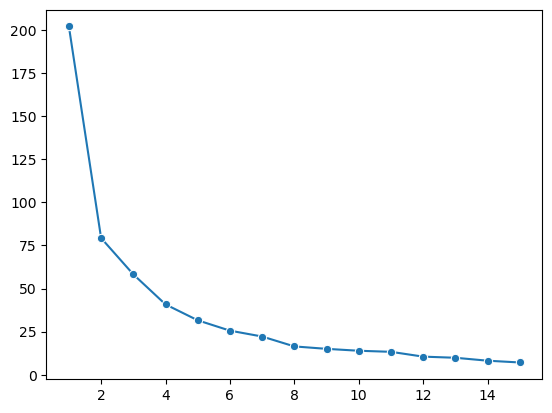

In [8]:
# inertia 값 저장할 리스트
inertias = []

for k in range(1, 16):  # k값의 범위 1~15로 지정
    model = KMeans(n_clusters=k, random_state=123)
    model.fit(scaled_df)
    inertias.append(model.inertia_)  # 선언해 둔 inertias 리스트에 model 학습해서 생성된 inertia_값 추가. (append!)

# k값에 따른 inertia값 시각화
sns.lineplot(x=range(1, 16), y=inertias, marker='o')

k가 커질수록 inertia는 계속 작아지고 있습니다.  

그러면 k가 15일 때 클러스터링이 가장 잘 된 걸까요? 그렇진 않습니다.  
inertia는 클러스터의 개수가 늘어날수록 계속 작아집니다. 그러다가, 클러스터가 데이터의 개수만큼 있을 땐 0이 되죠.

하지만, 클러스터의 개수가 많아질수록 클러스터링을 하는 의미가 사라집니다. 따라서, <span style="color:yellowgreen"> inertia가 작다고 무조건 좋은 것은 아닙니다</span>.

최적의 클러스터 개수는 inertia가 충분히 작지만, 분석 목적에 부합하도록 적당해야 합니다.  
그리고, 보통 그 지점은 시각화 한 <span style="color:yellowgreen"> 그래프의 기울기가 급격하게 줄어드는 구간</span>으로 정의합니다.  
예를 들어, 위의 그래프를 보면 k값이 2~3인 구간에서 기울기가 급격하게 줄어들고 있는데요. 따라서 여기서 최적의 k값은 2나 3이라고 볼 수 있습니다.  
이 때 그래프의 모양이 마치 팔꿈치 모양 같다고 해서, 이런 식으로 클러스터 개수를 찾는 방법을  
Elbow Method라고 부르죠.

그런데 Elbow Method를 통해 나온 결과를 반드시 따라야 하는 건 아니고요. 그냥 보조 지표 정도로 활용하고,  
상황이나 목적에 맞게 클러스터 개수를 조금 다르게 설정해도 괜찮습니다.  

예를 들어 고객들을 좀 더 다양한 세그먼트로 나눠서 보고 싶다면, 클러스터를 2~3개 대신 5개로 설정할 수도 있겠죠?  
k값이 2와 3 사이일 때 이미 기울기가 급격하게 줄어들기는 했지만, 5를 기점으로도 기울기 변화가 거의 없어질 정도로 완만해지고 있다고 볼 수도 있겠네요.  
이어지는 레슨에서는 클러스터 개수를 5개로 하여, 클러스터링의 결과를 해석해 보겠습니다.